<a href="https://colab.research.google.com/github/Saif-M-Dhrubo/hierarchical-attention-HAR/blob/master/Opportunity_preprocess_complex_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading

In [0]:
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/00226/OpportunityUCIDataset.zip
!unzip -q OpportunityUCIDataset.zip

--2020-04-03 17:43:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00226/OpportunityUCIDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 306636009 (292M) [application/x-httpd-php]
Saving to: ‘OpportunityUCIDataset.zip’

OpportunityUCIDatas 100%[===================>] 292.43M  21.9MB/s    in 14s     

2020-04-03 17:44:06 (20.7 MB/s) - ‘OpportunityUCIDataset.zip’ saved [306636009/306636009]



### Preprocessing

In [0]:
import numpy as np

import csv

from tqdm.autonotebook import tqdm, trange

In [0]:
# Hardcoded names of the files defining the OPPORTUNITY challenge data. As named in the original data.
file_list = ['S1-ADL1.dat', 'S1-ADL2.dat', 'S1-ADL3.dat', 'S1-ADL4.dat', 'S1-ADL5.dat', 'S1-Drill.dat',
             'S2-ADL1.dat', 'S2-ADL2.dat', 'S2-ADL3.dat', 'S2-ADL4.dat', 'S2-ADL5.dat', 'S2-Drill.dat',
             'S3-ADL1.dat', 'S3-ADL2.dat', 'S3-ADL3.dat', 'S3-ADL4.dat', 'S3-ADL5.dat', 'S3-Drill.dat',
             'S4-ADL1.dat', 'S4-ADL2.dat', 'S4-ADL3.dat', 'S4-ADL4.dat', 'S4-ADL5.dat', 'S4-Drill.dat']

## drill sessions do not contain any high level activity annotation
file_list_nodrill = ['S1-ADL1.dat', 'S1-ADL2.dat', 'S1-ADL3.dat', 'S1-ADL4.dat', 'S1-ADL5.dat',
             'S2-ADL1.dat', 'S2-ADL2.dat', 'S2-ADL3.dat', 'S2-ADL4.dat', 'S2-ADL5.dat',
             'S3-ADL1.dat', 'S3-ADL2.dat', 'S3-ADL3.dat', 'S3-ADL4.dat', 'S3-ADL5.dat', 
             'S4-ADL1.dat', 'S4-ADL2.dat', 'S4-ADL3.dat', 'S4-ADL4.dat', 'S4-ADL5.dat']

mid_label_map = [
            (0,      'Other'),
            (406516, 'Open Door 1'),
            (406517, 'Open Door 2'),
            (404516, 'Close Door 1'),
            (404517, 'Close Door 2'),
            (406520, 'Open Fridge'),
            (404520, 'Close Fridge'),
            (406505, 'Open Dishwasher'),
            (404505, 'Close Dishwasher'),
            (406519, 'Open Drawer 1'),
            (404519, 'Close Drawer 1'),
            (406511, 'Open Drawer 2'),
            (404511, 'Close Drawer 2'),
            (406508, 'Open Drawer 3'),
            (404508, 'Close Drawer 3'),
            (408512, 'Clean Table'),
            (407521, 'Drink from Cup'),
            (405506, 'Toggle Switch')]
mid_label_to_id = {str(x[0]): i for i, x in enumerate(mid_label_map)}
mid_idToLabel = [x[1] for x in mid_label_map]

hi_label_map = [(0, 'Other'),
                (101, 'Relaxing'), (102, 'Coffee time'),
                (103, 'Early morning'), (104, 'Cleanup'),
                (105, 'Sandwich time')]

hi_label_to_id = {str(x[0]): i for i, x in enumerate(hi_label_map)}
hi_idToLabel = [x[1] for x in hi_label_map]


cols = [
        38,  39,  40,  41,  42,  43,  44,  45,  46,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  77,  78,  79,  80,  81,  82,  83,  84,  85,  90,  91,  92,
        93,  94,  95,  96,  97,  98, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 245, 250]

selected_cols = np.asarray(cols)-1

In [0]:
def readOpportunityFiles(filelist, cols, mid_label_to_id, hi_label_to_id):
    data = []
    mid_labels = []
    hi_labels = []
    subject_mapping = []
    
    with trange(len(filelist)) as t:
        for i, filename in enumerate(filelist):
            t.set_description('Reading file %d of %d' % (i+1, len(filelist)))
            t.update(1)
            with open(f'OpportunityUCIDataset/dataset/{filename}', 'r') as f:
                reader = csv.reader(f, delimiter=' ')
                subject_info = [int(filename[1]), filename[3:7]]
                for line in reader:
                    elem = []
                    for ind in cols:
                        elem.append(line[ind])
                    if sum([x != 'NaN' for x in elem]) > 40:
                        data.append([float(x) for x in elem[:-2]])
                        mid_labels.append(mid_label_to_id[elem[-1]])
                        hi_labels.append(hi_label_to_id[elem[-2]])
                        subject_mapping.append(subject_info)

    return np.asarray(data), np.asarray(mid_labels, dtype=int), np.asarray(hi_labels, dtype=int), np.asarray(subject_mapping)

In [0]:
data, mid_labels, hi_labels, subject_mapping = readOpportunityFiles(file_list_nodrill, selected_cols, mid_label_to_id, hi_label_to_id)

In [0]:
np.unique(mid_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([524219,   6213,   6356,   4958,   5096,  11523,  10344,   4555,
          4231,   2958,   2724,   2720,   2343,   3870,   3722,   5901,
         24462,   4481]))

In [0]:
np.unique(hi_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([104068,  43090,  88113, 138449,  82678, 174278]))

ERROR! Session/line number was not unique in database. History logging moved to new session 61


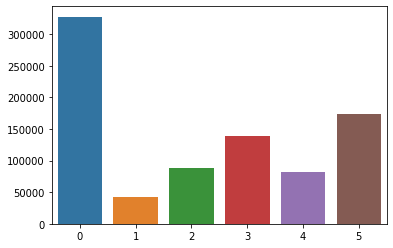

In [0]:
import seaborn as sns

sns.barplot(y=[327716,  43090,  88113, 138449,  82678, 174278], x= list(range(6)))

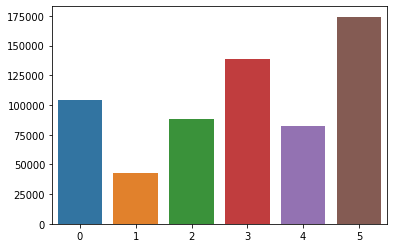

In [0]:
sns.barplot(y=[104068,  43090,  88113, 138449,  82678, 174278], x= list(range(6)))

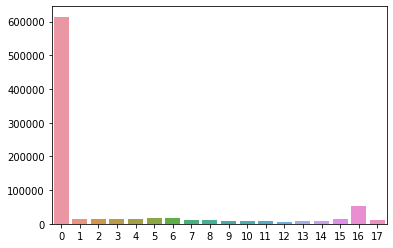

In [0]:
sns.barplot(y=[614649,  14105,  14675,  13383,  13739,  17778,  16120,  11399,
         10453,   8156,   6852,   7597,   6761,   9466,   9286,  15507,
         53463,  10935], x= list(range(18)))

In [0]:
subject_mapping[600000]

array(['3', 'Dril'], dtype='<U21')

In [0]:
np.savez_compressed('opp.npz', data=data, mid_labels=mid_labels, hi_labels = hi_labels, subject_mapping=subject_mapping)

In [0]:
## preprocessing and imputation used in on-attn-har

data_y = data_y.astype(int)

# Perform linear interpolation
data_x = np.array([Series(i).interpolate() for i in data_x.T]).T

# Remaining missing data are converted to zero
data_x[np.isnan(data_x)] = 0

# All sensor channels are normalized
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)